In [33]:
from src.morse import Morse
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [34]:
res_folder = "../../Data/artefacts/results/"

subfolder = os.walk(res_folder)

# key: ID, value: results table
results = {}

for sf_name in subfolder:
    if sf_name[0] != res_folder:
        id = int(sf_name[0].split("/")[-1].split("_")[0])
        results[id] = pd.read_csv(sf_name[0]+"/"+str(id)+"_result_table.csv", header=None, names=["Pers", "thr_large", "thr_small", "merge_thr", "result"])
        #print(results[id])

# key: ID, value: ....
statistics = {}

in_folder = "../../Data/artefacts/curvature/"

for filename in os.listdir(in_folder):
    id = int(filename.split("_")[0])
    statistics[id] = {}
    data = Morse()
    data.load_mesh_ply(in_folder + filename, quality_index=3, inverted=True)
    data.process_lower_stars()
    data.extract_morse_complex()

    statistics[id]["sal_edge"] = data.salient_edge_statistics(show = False)
    statistics[id]["fun_val"] = data.funval_statistics(show = False)
    statistics[id]["crit_fun_val"] = data.critical_funval_statistics(persistence=0, show=False)

load_mesh_ply took 23.39904 seconds to execute!
process_lower_stars took 3.63005 seconds to execute!
extract_morse_complex took 5.52672 seconds to execute!
Need to maximally reduce MorseComplex first...
Persistence was high enough that this complex is maximally reduced.
reduce_morse_complex took 3.71968 seconds to execute!
salient_edge_statistics took 3.72748 seconds to execute!
funval_statistics took 0.03836 seconds to execute!
critical_funval_statistics took 0.03352 seconds to execute!
load_mesh_ply took 23.13902 seconds to execute!
process_lower_stars took 3.83624 seconds to execute!
extract_morse_complex took 5.47824 seconds to execute!
Need to maximally reduce MorseComplex first...
Persistence was high enough that this complex is maximally reduced.
reduce_morse_complex took 3.80664 seconds to execute!
salient_edge_statistics took 3.81455 seconds to execute!
funval_statistics took 0.04925 seconds to execute!
critical_funval_statistics took 0.03712 seconds to execute!
load_mesh_ply 

AttributeError: 'NoneType' object has no attribute 'Separatrices'

In [ ]:
x = []
y = []
y2 = []
y3 = []
x2 = []
for id, df in results.items():
    res_df_85 = df[df["result"] > 85]
    res_df_90 = df[df["result"] > 90]
    print("-------------------------")
    print("Saledge:", statistics[id]["sal_edge"]["mean"], "+-", statistics[id]["sal_edge"]["std"])
    print("Median:", np.median(statistics[id]["sal_edge"]["persistences"]))
    print("Funval:", statistics[id]["fun_val"]["mean"], "+-", statistics[id]["fun_val"]["std"])
    pers = np.mean(np.array(res_df_90["Pers"]))
    thr_large = np.mean(np.array(res_df_90["thr_large"]))
    thr_small = np.mean(np.array(res_df_90["thr_small"]))
    merge_thr = np.mean(np.array(res_df_90["merge_thr"]))
    print("Params:", pers, thr_large, thr_small, merge_thr)
    print("Sal mean + std",statistics[id]["sal_edge"]["mean"] + statistics[id]["sal_edge"]["std"])
    print("Funval mean + std",statistics[id]["fun_val"]["mean"] + statistics[id]["fun_val"]["std"])
    if not np.isnan(pers):
        x.append(statistics[id]["fun_val"]["mean"] + statistics[id]["fun_val"]["std"])
        x2.append(statistics[id]["sal_edge"]["mean"] + statistics[id]["sal_edge"]["std"])
        y.append(pers)
        y2.append(thr_large)
        y3.append(thr_small)


-------------------------
Saledge: -0.006809848511590095 +- 0.06623464813734953
Median: -0.015390432206913829
Funval: -0.006964230421499818 +- 0.06217310308487498
Params: 0.06377049180327868 0.0721311475409836 0.04672131147540983 0.3426229508196721
Sal mean + std 0.05942479962575943
Funval mean + std 0.055208872663375166
-------------------------
Saledge: 0.0015967407325202434 +- 0.06422265218767786
Median: -0.00824918132275343
Funval: -0.002959168816714932 +- 0.05927542256803733
Params: 0.05916666666666668 0.07333333333333335 0.043333333333333335 0.46666666666666673
Sal mean + std 0.0658193929201981
Funval mean + std 0.0563162537513224
-------------------------
Saledge: -0.0179031906012881 +- 0.06566670235558973
Median: -0.024894464062526822
Funval: -0.01652079518352852 +- 0.06218610048076315
Params: 0.04 0.07 0.05 0.4
Sal mean + std 0.04776351175430163
Funval mean + std 0.04566530529723463
-------------------------
Saledge: -0.004359702677785296 +- 0.05974291852170928
Median: -0.0139

In [35]:
x = np.array(x).reshape((-1, 1))
x2 = np.array(x2).reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

model = LinearRegression()
model.fit(x2, y2)
model = LinearRegression().fit(x2, y2)
r_sq = model.score(x2, y2)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

model = LinearRegression()
model.fit(x2, y3)
model = LinearRegression().fit(x2, y3)
r_sq = model.score(x2, y3)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.08709242356057145
intercept: 0.03310930402785251
slope: [0.34687621]
coefficient of determination: 0.03614624962993107
intercept: 0.08473306038070016
slope: [-0.21519991]
coefficient of determination: 0.3041009640931196
intercept: 0.0768628508343466
slope: [-0.52076336]


In [36]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
model = LinearRegression().fit(x_, y2)
r_sq = model.score(x_, y2)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
model = LinearRegression().fit(x_, y3)
r_sq = model.score(x_, y3)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.16598135230083733
intercept: -0.11058247797915509
coefficients: [  5.43907718 -44.48427416]
coefficient of determination: 0.06986270398865724
intercept: 0.19500074466945783
coefficients: [-4.14139686 34.48758846]
coefficient of determination: 0.312049033628639
intercept: 0.12152907059041348
coefficients: [-2.11115113 13.96991526]


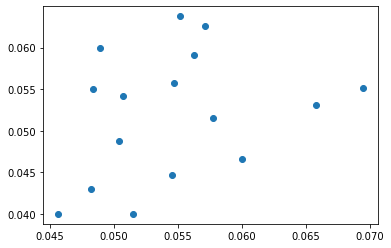

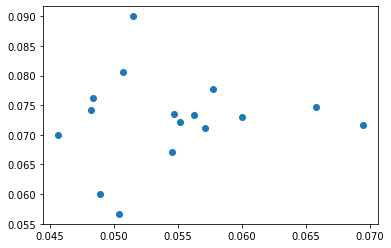

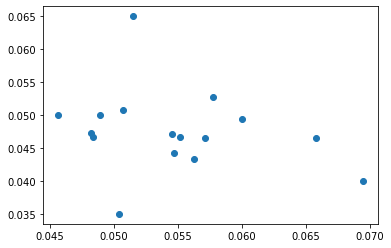

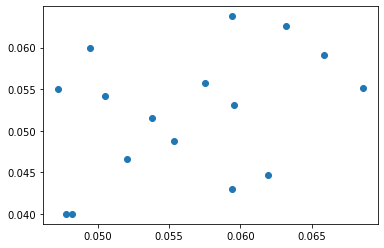

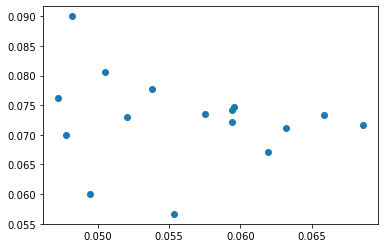

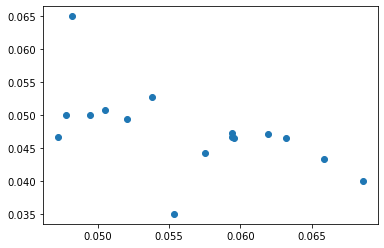

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()
plt.scatter(x,y2)
plt.show()
plt.scatter(x,y3)
plt.show()
plt.scatter(x2,y)
plt.show()
plt.scatter(x2,y2)
plt.show()
plt.scatter(x2,y3)
plt.show()

In [37]:
data = Morse()
data.load_mesh_ply("../../Data/artefact_31_test/curvature/31_r1.00_n4_v256.volume.ply", quality_index=3, inverted=True)

vertices = np.array([[v.x,v.y,v.z] for v in data.Vertices.values()])
faces = np.array([np.array(f.indices) for f in data.Faces.values()])

load_mesh_ply took 19.20403 seconds to execute!


In [38]:
print(faces)

[array({1643, 5492, 5487}, dtype=object)
 array({5496, 5494, 5495}, dtype=object)
 array({5497, 5499, 5500}, dtype=object) ...
 array({144338, 140293, 140367}, dtype=object)
 array({144338, 120386, 140367}, dtype=object)
 array({133618, 133734, 133815}, dtype=object)]


In [3]:
for id, st in statistics.items():
    #print("----------------------------")
    #print("ID:", id)
    print("Saledge:", st["sal_edge"]["mean"], "+-", st["sal_edge"]["std"])
    #print("Funval:", st["fun_val"]["mean"], "+-", st["fun_val"]["std"])
    #print("Crit0:", st["crit_fun_val"]['V']["mean"], "+-", st["crit_fun_val"]['V']["std"])
    #print("Crit1:", st["crit_fun_val"]['E']["mean"], "+-", st["crit_fun_val"]['E']["std"])
    #print("Crit2:", st["crit_fun_val"]['F']["mean"], "+-", st["crit_fun_val"]['F']["std"])


Saledge: 0.005620068899240415 +- 0.05311441384293576
Saledge: -0.004359702677785296 +- 0.05974291852170928
Saledge: -0.0179031906012881 +- 0.06566670235558973
Saledge: -0.0007534139591016744 +- 0.06930358408441899
Saledge: -0.014565086498558227 +- 0.07926703510813293
Saledge: -0.00988527674307989 +- 0.05793391250350692
Saledge: -0.006809848511590095 +- 0.06623464813734953
Saledge: -0.006710262313136447 +- 0.06991935743213129
Saledge: -0.0176081130069413 +- 0.06802498533152548
Saledge: -0.004794290032996068 +- 0.06669965956652951
Saledge: -0.005034955936666757 +- 0.0529008541061588
Saledge: -0.01308337346935823 +- 0.06258036520287055
Saledge: -0.01709092721516954 +- 0.06828361783067617
Saledge: -0.01033523686999867 +- 0.05852601612619949
Saledge: -0.00014731832492352427 +- 0.05971579829160547
Saledge: -0.010954067477136174 +- 0.061458835601469836
Saledge: 0.0015967407325202434 +- 0.06422265218767786
Saledge: 0.0024287843506442916 +- 0.057013743897766894
Saledge: -1.3479133022353948e-05 